# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# loading libraries
# !pip install --upgrade pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as rq
import tweepy as tw
import json
import os

from pandas.io.json import json_normalize 

# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_colwidth', -1)


In [2]:
# reading in the archive data
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# reading the .tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

folder_name = 'Image_Predict'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
response  = rq.get(url)
response

with open(os.path.join(folder_name, 
                       url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
df_image_predict = pd.read_csv('image-predictions.tsv', sep='\t')



3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Because of Twitter technical support issues, I chose the second option without calls to the
# Twitter API

# append tweet_json lines to empty list
data = []
with open('tweet-json.txt') as f:    
        for line in f:         
             data.append(json.loads(line))
#create dataframe from json data
df_api = pd.DataFrame(data)
#select columns of interest
columns_of_interest = ['id', 'retweet_count', 'favorite_count', 'full_text']
df_tweet_api = df_api[columns_of_interest]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment ### 

 


### **df_archive**

In [5]:
# visual instpection of df_archive whole dataset
df_archive



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
#

# df_archive.head(2)
# df_archive.sort_values('pupper', ascending=False)


df_archive[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.value_counts)
df_archive.timestamp.value_counts()


2016-03-18 15:05:29 +0000    1
2015-11-28 03:31:48 +0000    1
2016-07-11 01:11:51 +0000    1
2015-12-26 17:12:55 +0000    1
2017-05-23 17:40:04 +0000    1
2016-01-15 02:41:12 +0000    1
2015-12-09 02:56:22 +0000    1
2017-04-24 16:22:16 +0000    1
2015-11-30 18:07:47 +0000    1
2015-11-19 04:39:35 +0000    1
2016-02-17 03:45:29 +0000    1
2016-06-08 02:41:38 +0000    1
2016-03-11 17:50:48 +0000    1
2016-02-04 01:07:39 +0000    1
2016-09-27 16:06:28 +0000    1
2015-11-28 19:04:19 +0000    1
2016-02-22 21:59:57 +0000    1
2016-01-28 02:30:58 +0000    1
2016-09-21 17:42:10 +0000    1
2016-01-22 05:07:29 +0000    1
2017-06-17 16:52:05 +0000    1
2016-06-05 23:53:41 +0000    1
2015-12-30 16:51:48 +0000    1
2017-06-10 16:39:04 +0000    1
2016-12-14 17:16:53 +0000    1
2015-12-13 21:07:04 +0000    1
2016-04-13 01:22:10 +0000    1
2016-09-11 21:34:30 +0000    1
2016-06-06 01:02:55 +0000    1
2015-12-04 02:31:10 +0000    1
                            ..
2016-06-23 01:25:06 +0000    1
2015-12-

In [7]:
# list(df_archive.columns)
# ['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source', 'text',
# 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls',
# 'rating_numerator','rating_denominator','name','doggo','floofer','pupper','puppo']

# list(df_image_predict.columns)
# ['tweet_id','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3',
# 'p3_conf','p3_dog']

# list(df_tweet_api.columns)
df_tweet_api.drop('full_text', inplace=True, axis=1)
# ['id', 'retweet_count', 'favorite_count', 'full_text']
df_tweet_api.info()


# df_archive.tail(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
#
df_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1714,680440374763077632,NaN,NaN,2015-12-25 17:30:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Merry Christmas. My gift to you is this tiny u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680440374...,11,10,None,None,None,None,None


In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### **df_image_predict**

In [11]:
# visual instpection of df_image_predict, whole dataset
df_image_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
df_image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
#
df_image_predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
#
df_image_predict.sort_values(['p1_conf', 'p1'], ascending=False)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,1.002880e-05,True,Eskimo_dog,1.434470e-06,True
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,barrow,0.999962,False,basset,1.448950e-05,True,wok,6.060880e-06,False
149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,llama,4.309810e-05,False,ram,2.160900e-07,False
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,2.335910e-05,True,dhole,3.010330e-06,False
230,670408998013820928,https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg,1,ping-pong_ball,0.999945,False,tennis_ball,1.763430e-05,False,racket,1.470730e-05,False
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False,European_gallinule,2.987300e-05,False,agama,2.150760e-05,False
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False,pug,7.657020e-05,True,menu,2.164680e-06,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
865,697463031882764288,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,True,golden_retriever,9.758170e-05,True,pug,8.267760e-06,True


In [15]:
#
df_image_predict.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
626,680801747103793152,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,1,pug,0.99672,True,Labrador_retriever,0.001439,True,Staffordshire_bullterrier,0.000518,True


In [16]:
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#
df_image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### **df_tweet_api**

In [18]:
# # visual instpection of df_tweet_api, whole dataset
df_tweet_api

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [19]:
#
df_tweet_api.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


In [20]:
#
df_tweet_api.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [21]:
#
df_tweet_api.sample()

,id,retweet_count,favorite_count
122,868880397819494401,12518,55098


In [22]:
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [23]:
#
df_tweet_api.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Programmatic Assessment

### **df_archive**

In [24]:
# total number of null values in dataset
df_archive.isnull().sum().sum()

11140

In [25]:
# percentage missing in each column of the dataset
arch_is = df_archive.isnull().sum()
arch_not = df_archive.notnull().sum()
arch_percent_missing = arch_is / df_archive.shape[0] * 100
arch_percent_not_missing = arch_not / df_archive.shape[0] * 100
arch_percent_missing

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

In [26]:
# obtaining value counts sum for each column to get an overall view
for c in df_archive.columns:
    print ("---- %s ---" % c)
    print (df_archive[c].value_counts().sum())

---- tweet_id ---
2356
---- in_reply_to_status_id ---
78
---- in_reply_to_user_id ---
78
---- timestamp ---
2356
---- source ---
2356
---- text ---
2356
---- retweeted_status_id ---
181
---- retweeted_status_user_id ---
181
---- retweeted_status_timestamp ---
181
---- expanded_urls ---
2297
---- rating_numerator ---
2356
---- rating_denominator ---
2356
---- name ---
2356
---- doggo ---
2356
---- floofer ---
2356
---- pupper ---
2356
---- puppo ---
2356


In [27]:
# check for duplicated rows, ect
df_archive.duplicated().sum()

0

### **df_image_predict**

In [28]:
# total number of null values in dataset
df_image_predict.isnull().sum().sum()

0

In [29]:
# total number of null values in dataset in each column
df_image_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
# check for duplicated rows, ect
df_image_predict.duplicated().sum()

0

In [34]:
# # obtaining top 5 value count percentages for each dog name prediction to get an overall view. 
for c in df_image_predict.iloc[:,[3,6,9]]:
    dogs = round(df_image_predict[c].value_counts(normalize=True) \
#            .mul(100).sort_values(ascending=False).head())
           .mul(100).sort_values(ascending=False))
    # print results
    print ("---- %s ---" % c)
    print (dogs)
   

---- p1 ---
golden_retriever             7.0
Labrador_retriever           5.0
Pembroke                     4.0
Chihuahua                    4.0
pug                          3.0
chow                         2.0
Samoyed                      2.0
toy_poodle                   2.0
Pomeranian                   2.0
cocker_spaniel               1.0
malamute                     1.0
French_bulldog               1.0
Chesapeake_Bay_retriever     1.0
miniature_pinscher           1.0
seat_belt                    1.0
Staffordshire_bullterrier    1.0
German_shepherd              1.0
Siberian_husky               1.0
Cardigan                     1.0
web_site                     1.0
Shetland_sheepdog            1.0
Eskimo_dog                   1.0
teddy                        1.0
beagle                       1.0
Maltese_dog                  1.0
Rottweiler                   1.0
Lakeland_terrier             1.0
Shih-Tzu                     1.0
kuvasz                       1.0
Italian_greyhound            1.

In [ ]:
df_image_predict

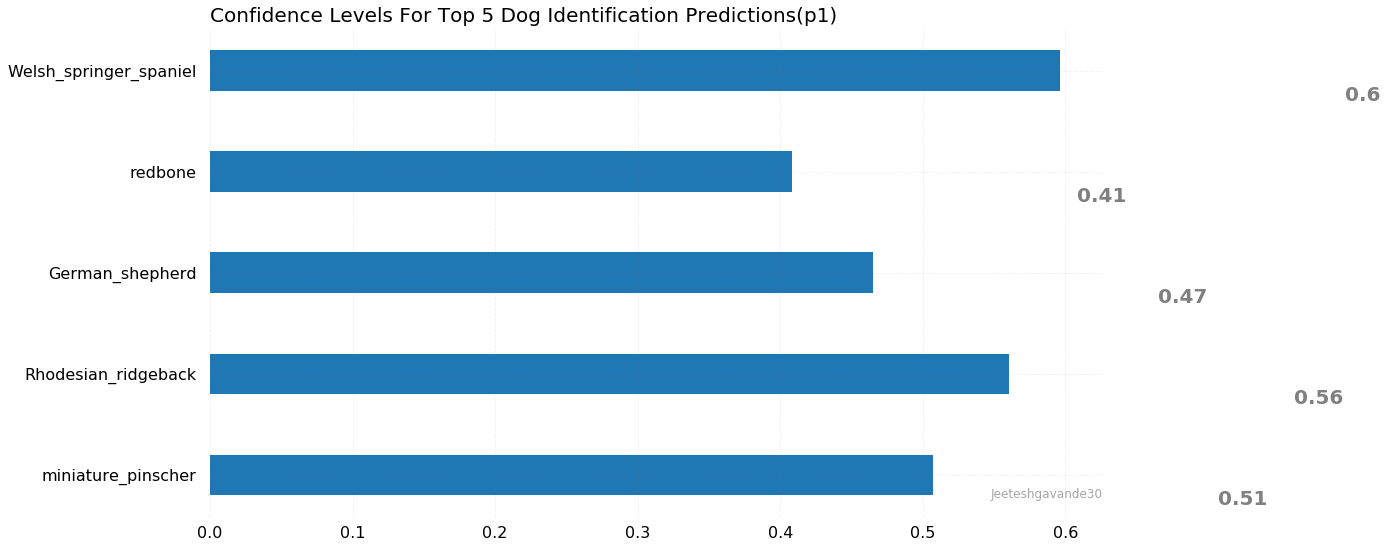

In [35]:
# TEST PLOT NOTES: clean data to restrict confidence levels <= 97, use groupby?  Move visualization to that section.

# dog_name1_grp = df_image_predict.groupby('p1').groups()
dog_name1 = df_image_predict['p1'].head()
# dog_name2 = df_image_predict['p2'].head()
# dog_name3 = df_image_predict['p3'].head()

p1_conf = df_image_predict['p1_conf'].head()
# df_image_predict.groupby(['p1', 'p1_conf']).groups
    
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

 
# Horizontal Bar Plot
ax.barh(dog_name1, p1_conf, height=0.40)
ax.set_yticklabels(dog_name1)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 20, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Confidence Levels For Top 5 Dog Identification Predictions(p1)',
             fontsize=20, loc ='left', )
plt.xticks(size=16)
plt.yticks(size=16)
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

### **df_tweet_api**

In [ ]:
# total number of null values in dataset
df_tweet_api.isnull().sum().sum()

In [ ]:
# nulls/not nulls in columns
api_is = df_tweet_api.isnull().sum()
api_not = df_tweet_api.notnull().sum()
api_percent_missing = api_is / df_tweet_api.shape[0] * 100
api_percent_not_missing = api_not / df_tweet_api.shape[0] * 100
api_percent_missing

#### Datasets Initial Assessment Notes
**The Twitter archive table (df_archive):**<br>

- Missing data in the 'retweeted_status_id', 'retweeted_status_user_id', and
  'retweeted_status_timestamp' columns.<br>	

- The 'name' column has mixed-case entries and in some cases just a single letter to represent dog names which seems odd. A consistency issue that needs to be fixed.<br>
 
- The tweet_id as well as the rest of the '_id' columns are not in string format which they should be.<br>
- The 'timestamp' column is in string format, which needs to be converted to datetime<br>

- the 'source' column doesn't need the entire http address, it can be shortened to the app name or service.

- categorical column names 'doggo', 'pupper', 'floofer', and 'puppo' are not variables, they're values that should exist under a new column name such as 'dog_kind', or'type', ect **(TIDY)**

- since we just need original tweets we can exclude values in the retweet status, id, and timestamp columns, which will later be dropped

- the text column(tweet message) still includes the rating and a url, which are already columns
  so these will be parsed out keeping only the message text.

**The image prediction table (df_image_predict):**<br>

- Columns 'p1', 'p2', 'p3', and 'p4' have consistency issues with text case as well, and incorrect datatype for 'tweet_id'.
- The prediction algorthm predicted entries that are inanimate objects, or animals that are not dogs in the above mentioned columns.<br>

**The API table (df_tweet_api):**<br>

- Like the other datasets the 'id' column's datatype is not correct

- this table needs to be joined with the archive table.







In [ ]:
all_columns = pd.Series(list(df_archive) + list(df_image_predict) + list(df_tweet_api))
all_columns[all_columns.duplicated()]
all_columns

### Quality issues
1. The tweet_id as well as the rest of the '_id' columns are not in string format which they should be.

2. The 'name' column has mixed-case entries and in some cases just a single letter to represent dog names which seems odd. A consistency issue that needs to be fixed.

3. The 'timestamp' column is in string format, which needs to be converted to datetime

4. The 'source' column doesn't need the entire http address, it can be shortened to the app name or service.

5. Since we just need original tweets we can exclude values in the retweet status, id, and timestamp columns, which will later be dropped

6. The text column(tweet message) still includes the dog rating and a url, which are already separate columns so these will be parsed out keeping only the message text.

7. Missing values in several columns

8. The image prediction table has multiple predictions as inanimate objects, or other animals besides dogs.

### Tidiness issues
1. Data redundancy from information being repeated across the three tables. One or two tables are needed.

2. Categorical values 'doggo', 'pupper', 'floofer', and 'puppo' are not variables, they are listed as column headers. These are values that should exist under one column label such as 'dog_kind', or'type', ect (TIDY).

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [ ]:
# Make copies of original pieces of data


### Issue #1:

#### Define:

#### Code

#### Test

### Issue #2:

#### Define

#### Code

#### Test

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.

2.

3.

### Visualization